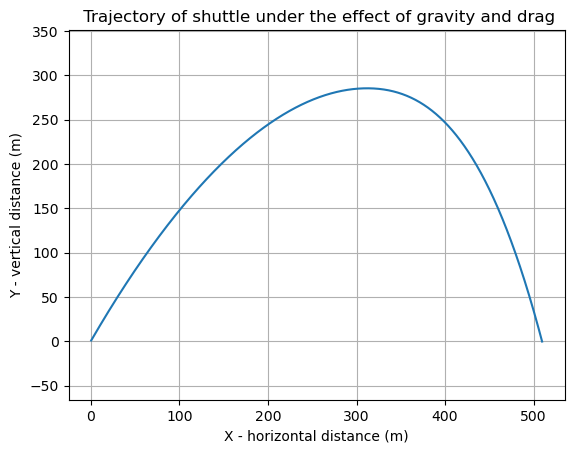

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
x = 0
y = 0
t = 0 # Elapsed time as the projectile undergoes trajectory (s)
dt = 0.01 # Time step (s)
g = 9.81

u = 100 # Launch velocity (m/s)
angle = np.deg2rad(60)
ang_acc = np.deg2rad(- 90)
ux = u * np.cos(angle)
uy = u * np.sin(angle)
vx = ux
vy = uy

t_total = (2 * uy) / g # Time of flight (s)

# Drag parameters
r = 0.05 # radius (m)
rho = 1.225  # air density (kg/m^3)
C_d = 0.1 # drag coefficient (for a sphere)
A = np.pi * (r ** 2)  # cross-sectional area of the projectile (m^2)
m = 0.5  # mass of the projectile (kg)

x_list, y_list, vx_list, vy_list = [], [], [], []


while t <= t_total and y >= 0: # Till the time projectile hits the ground back
    
    if vy >= 0:
        F_d_x =  0.5 * rho * vx**2 * A * C_d 
    else:
        F_d_x =  0.5 * rho * vx**2 * A * 4 * C_d 
        
    F_d_y = + 0.5 * rho * vy**2 * A * C_d
    
    dx = 0.5 * ((g * np.cos(ang_acc)) - F_d_x/m) * (dt**2)
    dy = 0.5 * ((g * np.sin(ang_acc)) - F_d_y/m) * (dt**2) 
    dvx = (- F_d_x / m) * dt
    
    if vy >= 0:
        dvy = ((-g * m - F_d_y) / m) * dt
    else:
        dvy = ((-g * m + F_d_y) / m) * dt
    
    vx = vx + dvx
    vy = vy + dvy
    x += (vx * dt) + dx
    y += (vy * dt) + dy
   
    t = t + dt

    x_list.append(x)
    y_list.append(y)
    vx_list.append(vx)
    vy_list.append(vy)
    
#print(vx_list)
#print(vy_list)

def plot_trajectory(x_list, y_list):
    plt.plot(x_list, y_list)
    plt.title(" Trajectory of shuttle under the effect of gravity and drag")
    plt.xlabel("X - horizontal distance (m)")
    plt.ylabel("Y - vertical distance (m)")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

plot_trajectory(x_list, y_list)